In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from gammapy.maps import Map
from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets, FluxPointsDataset
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    SkyModel,
    PointSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
    PiecewiseNormSpectralModel,
)
from gammapy.estimators import TSMapEstimator, ExcessMapEstimator
from gammapy.estimators import FluxPoints, FluxPointsEstimator

from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys
sys.path.append('../')
import Dataset_load 
from scipy.interpolate import interp2d

from  Dataset_Setup import Setup, GaussianCovariance_matrix


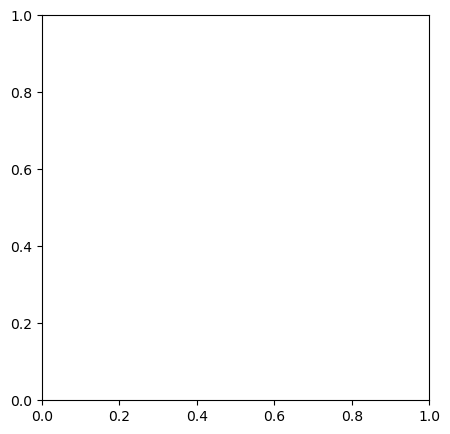

In [2]:
savefig = 1
picformat = "png"
fig, a_fake = plt.subplots(1, 1, figsize=(5.0, 5.0))

In [3]:
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import seaborn as sns
s = sns.color_palette("colorblind")
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[s_ for s_ in s]) 
s

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [4]:
scaled_amplitude = Parameter("amplitude", value=1e-11)

dataset_asimov = Dataset_load.create_asimov(
    model="pl", source="PKSflare", parameters=Parameters([scaled_amplitude])
)

loaded dataset:
/home/katrin/Documents/nuisance_summary/PKS_flare/HESS_public/dataset-simulated-pl.fits.gz


In [5]:
norm = 0.1
tilt = 0.0
bias = 0.0
resolution = 0.0

In [6]:
setup = Setup(dataset_input=dataset_asimov)
#setup.set_up_irf_sys(bias, resolution, norm, tilt)
dataset_asimov, dataset_asimov_N = setup.run()
# irf model
setup.set_irf_model(dataset_asimov_N)
dataset_asimov_N.models.parameters['resolution'].frozen = True
dataset_asimov_N.irf_model.parameters['tilt'].frozen = True
dataset_asimov_N.irf_model.parameters['bias'].frozen = True
dataset_asimov_N.irf_model.parameters['norm'].frozen = False
setup.set_irf_prior(dataset_asimov_N, bias, resolution, norm, tilt)

In [7]:
print(dataset_asimov.models)

DatasetModels

Component 0: SkyModel

  Name                      : aEaZD8Bs
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.300   +/-    0.00             
    amplitude                     :   1.00e-11   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lon_0                         :    329.680   +/-    0.00 deg         
    lat_0                         :    -30.222   +/-    0.00 deg         

Component 1: FoVBackgroundModel

  Name                      : 637k5vNk-bkg
  Datasets names            : ['637k5vNk']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                          :      0.000   +/-    0.00             
    reference             (frozen):     

In [8]:
print(dataset_asimov_N.models)

DatasetModels

Component 0: SkyModel

  Name                      : aEaZD8Bs
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.300   +/-    0.00             
    amplitude                     :   1.00e-11   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lon_0                         :    329.680   +/-    0.00 deg         
    lat_0                         :    -30.222   +/-    0.00 deg         

Component 1: FoVBackgroundModel

  Name                      : 7PGK9vrA-bkg
  Datasets names            : ['7PGK9vrA']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                          :      0.000   +/-    0.00             
    reference             (frozen):     

In [9]:
fit = Fit()
result = fit.run(dataset_asimov)

In [10]:
fit = Fit()
result = fit.run(dataset_asimov_N)

In [11]:
print(dataset_asimov.models)

DatasetModels

Component 0: SkyModel

  Name                      : aEaZD8Bs
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.300   +/-    0.01             
    amplitude                     :   1.00e-11   +/- 1.1e-13 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lon_0                         :    329.680   +/-    0.00 deg         
    lat_0                         :    -30.222   +/-    0.00 deg         

Component 1: FoVBackgroundModel

  Name                      : 637k5vNk-bkg
  Datasets names            : ['637k5vNk']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                          :      0.000   +/-    0.00             
    reference             (frozen):     

In [12]:
print(dataset_asimov_N.models)

DatasetModels

Component 0: SkyModel

  Name                      : aEaZD8Bs
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.301   +/-    0.01             
    amplitude                     :   1.00e-11   +/- 1.2e-12 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lon_0                         :    329.680   +/-    0.00 deg         
    lat_0                         :    -30.222   +/-    0.00 deg         

Component 1: FoVBackgroundModel

  Name                      : 7PGK9vrA-bkg
  Datasets names            : ['7PGK9vrA']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                          :      0.000   +/-    0.00             
    reference             (frozen):     

In [13]:
def make_writeable(stat_amplitude):
    text = dict()
    text['scanvalues']  = [float(_) for _ in stat_amplitude[list(stat_amplitude.keys())[0]]]
    text['stat_scan'] = [float(_) for _ in stat_amplitude['stat_scan']]
    return text


In [14]:
%%time
#dataset_asimov.models.parameters['amplitude'].scan_values = dataset_asimov_N.models.parameters['amplitude'].scan_values
computing = 0
if computing:
    stat_amplitude = fit.stat_profile(dataset_asimov, dataset_asimov.models.parameters['amplitude'],
                                      reoptimize=True)
    stat_amplitude_N = fit.stat_profile(dataset_asimov_N, dataset_asimov_N.models.parameters['amplitude'],
                                        reoptimize=True)
    with open(f"0_example_scan.yml", "w") as outfile:
        yaml.dump(make_writeable(stat_amplitude), outfile, default_flow_style=False)
    with open(f"0_example_scan_N.yml", "w") as outfile:
        yaml.dump(make_writeable(stat_amplitude_N), outfile, default_flow_style=False)
        
    stat_norm = fit.stat_profile(dataset_asimov, dataset_asimov.models.parameters['norm'],
                                      reoptimize=True)
    stat_norm_N = fit.stat_profile(dataset_asimov_N, dataset_asimov_N.models.parameters['norm'],
                                        reoptimize=True)
    with open(f"0_example_scan_norm.yml", "w") as outfile:
        yaml.dump(make_writeable(stat_norm), outfile, default_flow_style=False)
    with open(f"0_example_scan_norm_N.yml", "w") as outfile:
        yaml.dump(make_writeable(stat_norm_N), outfile, default_flow_style=False)
else:
    with open(f"0_example_scan.yml", "r") as stream:
        stat_amplitude = yaml.safe_load(stream)
    with open(f"0_example_scan_N.yml", "r") as stream:
        stat_amplitude_N = yaml.safe_load(stream)
    with open(f"0_example_scan_norm.yml", "r") as stream:
        stat_norm = yaml.safe_load(stream)
    with open(f"0_example_scan_norm_N.yml", "r") as stream:
        stat_norm_N = yaml.safe_load(stream)    


CPU times: user 4.09 ms, sys: 292 µs, total: 4.38 ms
Wall time: 4.8 ms


In [ ]:
stat_amplitude['stat_scan'] -= np.min(stat_amplitude['stat_scan'])
stat_amplitude_N['stat_scan'] -= np.min(stat_amplitude_N['stat_scan'])


min_ = np.min(stat_amplitude['stat_scan'])
min_N = np.min(stat_amplitude_N['stat_scan'])
mins = [min_N, min_, ]

fig, ax  = plt.subplots(2,1, figsize = (4,6))
ax[0].plot(stat_amplitude_N[list(stat_amplitude.keys())[0]],
        stat_amplitude_N['stat_scan'],label = "Likelihood + Prior")
ax[0].plot(stat_amplitude[list(stat_amplitude.keys())[0]],
        stat_amplitude['stat_scan'],label = "Likelihood")

for i, par in enumerate([ dataset_asimov_N.models.parameters['amplitude'], 
            dataset_asimov.models.parameters['amplitude']]):
    ax[0].fill_betweenx(y=(mins[i], mins[i]+ 1), 
                  x1=(par.value - par.error),
                  x2 =(par.value + par.error), color = s[i],
                     alpha = 0.3)



ax[0].legend()
ax[0].set_ylim(min_ - 0.5, min_ + 2)
ax[0].set_xlim(0.83e-11, 1.17e-11)
ax[0].set_xlabel("Amplitude [1/TeVscm2]")
ax[0].set_ylabel("-2 log(L)")


energy_bounds = (0.3, 100 ) *u.TeV
energy_power = 2

dataset_asimov_N.models[0].spectral_model.plot(energy_bounds = energy_bounds, ax = ax[1],
                                              energy_power = energy_power)
dataset_asimov_N.models[0].spectral_model.plot_error(energy_bounds = energy_bounds,
                                                    facecolor = s[0], alpha = 0.3, ax = ax[1],
                                                    energy_power = energy_power,
                                                    label = "Error without nuisance par.")


dataset_asimov.models[0].spectral_model.plot(energy_bounds = energy_bounds, ax = ax[1],
                                            energy_power = energy_power)
dataset_asimov.models[0].spectral_model.plot_error(energy_bounds = energy_bounds,
                                                    facecolor = s[1], alpha = 0.7, ax = ax[1],
                                                  energy_power = energy_power,
                                                  label = "Error with nuisance par.")
dataset_asimov_N.models[0].spectral_model.plot(energy_bounds = energy_bounds, ax = ax[1],
                                              energy_power = energy_power, color = s[0])
plt.legend()